FIR LOW pass

In [1]:
from numpy import sin, arange, pi
from scipy.signal import lfilter,firwin,butter, lfilter, freqz
from scipy import signal
from pylab import figure, plot, grid, show
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import filter_design as fd

#%matplotlib notebook

In [2]:
#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------
# 320 samples of (1000Hz + 15000 Hz) at 48 kHz
sample_rate = 48000.
nsamples = 320

F_1KHz = 300. # 1000
A_1KHz = 1.0

F_15KHz = 5000. # 15000
A_15KHz = 0.5

t = arange(nsamples) / sample_rate
signal = A_1KHz * sin(2*pi*F_1KHz*t) + A_15KHz*sin(2*pi*F_15KHz*t)

In [3]:
#------------------------------------------------
# Create a FIR filter and apply it to signal.
#------------------------------------------------
nyq_rate = sample_rate / 2.

# The cutoff frequency of the filter: 6KHz
cutoff_hz = 3000.0

# Length of the filter (number of coefficients, i.e. the filter order + 1)
numtaps = 29

# Use firwin to create a lowpass FIR filter
fir_coeff = firwin(numtaps, cutoff_hz/nyq_rate)

# Use lfilter to filter the signal with the FIR filter
filtered_signal = lfilter(fir_coeff, 1.0, signal)


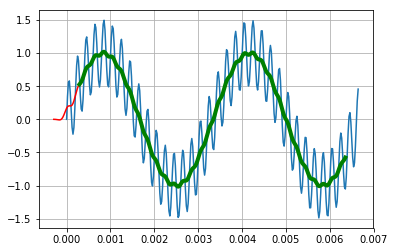

In [4]:
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The first N-1 samples are "corrupted" by the initial conditions
warmup = numtaps - 1

# The phase delay of the filtered signal
delay = (warmup / 2) / sample_rate

figure(1)
# Plot the original signal
plot(t, signal)

# Plot the filtered signal, shifted to compensate for the phase delay
plot(t-delay, filtered_signal, 'r-')

# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[warmup:]-delay, filtered_signal[warmup:], 'g', linewidth=4)

grid(True)

show()

In [5]:
#------------------------------------------------
# Print values
#------------------------------------------------
def print_values(label, values):
    var = "float32_t %s[%d]" % (label, len(values))
    print ("%-30s = {%s}" % (var, ', '.join(["%+.10f" % x for x in values])))

print_values('signal', signal)
print_values('fir_coeff', fir_coeff)
print_values('filtered_signal', filtered_signal)

float32_t signal[320]          = {+0.0000000000, +0.3436405303, +0.5614220089, +0.5794771637, +0.4064344650, +0.1298272259, -0.1201080267, -0.2242819808, -0.1239957075, +0.1547753409, +0.5120929549, +0.8153364077, +0.9539904997, +0.8852979116, +0.6519080873, +0.3642285168, +0.1547725504, +0.1233715186, +0.2958946577, +0.6135376494, +0.9571067812, +1.1962622757, +1.2433688787, +1.0896976454, +0.8090169944, +0.5270888978, +0.3696772512, +0.4105562408, +0.6410065242, +0.9734062699, +1.2774329231, +1.4339137666, +1.3840692182, +1.1537969526, +0.8429603978, +0.5841086103, +0.4876883406, +0.5963917868, +0.8675078112, +1.1905707524, +1.4330127019, +1.4949514669, +1.3504707243, +1.0583315531, +0.7376883406, +0.5188455141, +0.4894070073, +0.6580745219, +0.9510565163, +1.2425720504, +1.4068424457, +1.3700829401, +1.1410065242, +0.8072329110, +0.4990867738, +0.3357471816, +0.3760042925, +0.5939752147, +0.8898154882, +1.1309991796, +1.2071067812, +1.0754774157, +0.7788575709, +0.4277522331, +0.154

FIR HIGH PASS

In [6]:
#------------------------------------------------
# Create a FIR filter and apply it to signal.
#------------------------------------------------
nyq_rate = sample_rate / 2.

# The cutoff frequency of the filter: 6KHz
cutoff_hz = 2000.0

# Length of the filter (number of coefficients, i.e. the filter order + 1)
numtaps = 29

# Use firwin to create a highpass FIR filter
fir_coeff = firwin(numtaps, cutoff_hz/nyq_rate,pass_zero=False)

# Use lfilter to filter the signal with the FIR filter
filtered_signal = lfilter(fir_coeff, 1.0, signal)


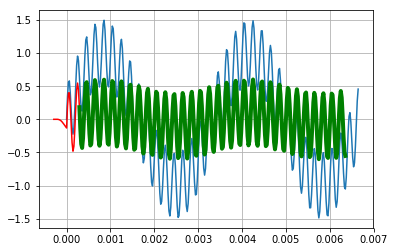

In [7]:
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The first N-1 samples are "corrupted" by the initial conditions
warmup = numtaps - 1

# The phase delay of the filtered signal
delay = (warmup / 2) / sample_rate

figure(1)
# Plot the original signal
plot(t, signal)

# Plot the filtered signal, shifted to compensate for the phase delay
plot(t-delay, filtered_signal, 'r-')

# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[warmup:]-delay, filtered_signal[warmup:], 'g', linewidth=4)

grid(True)

show()

In [8]:
#------------------------------------------------
# Print values
#------------------------------------------------
def print_values(label, values):
    var = "float32_t %s[%d]" % (label, len(values))
    print ("%-30s = {%s}" % (var, ', '.join(["%+.10f" % x for x in values])))

print_values('signal', signal)
print_values('fir_coeff', fir_coeff)
print_values('filtered_signal', filtered_signal)

float32_t signal[320]          = {+0.0000000000, +0.3436405303, +0.5614220089, +0.5794771637, +0.4064344650, +0.1298272259, -0.1201080267, -0.2242819808, -0.1239957075, +0.1547753409, +0.5120929549, +0.8153364077, +0.9539904997, +0.8852979116, +0.6519080873, +0.3642285168, +0.1547725504, +0.1233715186, +0.2958946577, +0.6135376494, +0.9571067812, +1.1962622757, +1.2433688787, +1.0896976454, +0.8090169944, +0.5270888978, +0.3696772512, +0.4105562408, +0.6410065242, +0.9734062699, +1.2774329231, +1.4339137666, +1.3840692182, +1.1537969526, +0.8429603978, +0.5841086103, +0.4876883406, +0.5963917868, +0.8675078112, +1.1905707524, +1.4330127019, +1.4949514669, +1.3504707243, +1.0583315531, +0.7376883406, +0.5188455141, +0.4894070073, +0.6580745219, +0.9510565163, +1.2425720504, +1.4068424457, +1.3700829401, +1.1410065242, +0.8072329110, +0.4990867738, +0.3357471816, +0.3760042925, +0.5939752147, +0.8898154882, +1.1309991796, +1.2071067812, +1.0754774157, +0.7788575709, +0.4277522331, +0.154

FIR Band PASS

In [9]:
#------------------------------------------------
# Create a FIR filter and apply it to signal.
#------------------------------------------------
nyq_rate = sample_rate / 2.

# The cutoff frequency of the filter: 6KHz
cutoff_hz = 2000.0
cutoff_hz1 = 4000.0

# Length of the filter (number of coefficients, i.e. the filter order + 1)
numtaps = 29

# Use firwin to create a bandpass FIR filter
fir_coeff = firwin(numtaps, cutoff = [(cutoff_hz/nyq_rate) ,(cutoff_hz1/nyq_rate)],pass_zero=False)

# Use lfilter to filter the signal with the FIR filter
filtered_signal = lfilter(fir_coeff, 1.0, signal)

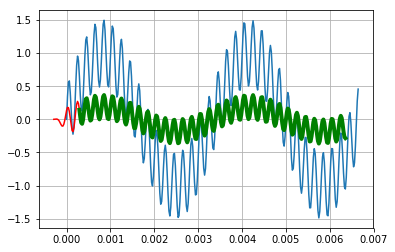

In [10]:
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The first N-1 samples are "corrupted" by the initial conditions
warmup = numtaps - 1

# The phase delay of the filtered signal
delay = (warmup / 2) / sample_rate

figure(1)
# Plot the original signal
plot(t, signal)

# Plot the filtered signal, shifted to compensate for the phase delay
plot(t-delay, filtered_signal, 'r-')

# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[warmup:]-delay, filtered_signal[warmup:], 'g', linewidth=4)

grid(True)

show()

In [11]:
#------------------------------------------------
# Print values
#------------------------------------------------
def print_values(label, values):
    var = "float32_t %s[%d]" % (label, len(values))
    print ("%-30s = {%s}" % (var, ', '.join(["%+.10f" % x for x in values])))

print_values('signal', signal)
print_values('fir_coeff', fir_coeff)
print_values('filtered_signal', filtered_signal)

float32_t signal[320]          = {+0.0000000000, +0.3436405303, +0.5614220089, +0.5794771637, +0.4064344650, +0.1298272259, -0.1201080267, -0.2242819808, -0.1239957075, +0.1547753409, +0.5120929549, +0.8153364077, +0.9539904997, +0.8852979116, +0.6519080873, +0.3642285168, +0.1547725504, +0.1233715186, +0.2958946577, +0.6135376494, +0.9571067812, +1.1962622757, +1.2433688787, +1.0896976454, +0.8090169944, +0.5270888978, +0.3696772512, +0.4105562408, +0.6410065242, +0.9734062699, +1.2774329231, +1.4339137666, +1.3840692182, +1.1537969526, +0.8429603978, +0.5841086103, +0.4876883406, +0.5963917868, +0.8675078112, +1.1905707524, +1.4330127019, +1.4949514669, +1.3504707243, +1.0583315531, +0.7376883406, +0.5188455141, +0.4894070073, +0.6580745219, +0.9510565163, +1.2425720504, +1.4068424457, +1.3700829401, +1.1410065242, +0.8072329110, +0.4990867738, +0.3357471816, +0.3760042925, +0.5939752147, +0.8898154882, +1.1309991796, +1.2071067812, +1.0754774157, +0.7788575709, +0.4277522331, +0.154

FIR BAND REJECT

In [12]:
#------------------------------------------------
# Create a FIR filter and apply it to signal.
#------------------------------------------------
nyq_rate = sample_rate / 2.

# The cutoff frequency of the filter: 6KHz
cutoff_hz = 500.0
cutoff_hz1 = 1500.0

# Length of the filter (number of coefficients, i.e. the filter order + 1)
numtaps = 29

# Use firwin to create a bandreject FIR filter
fir_coeff = firwin(numtaps, cutoff = [(cutoff_hz/nyq_rate) ,(cutoff_hz1/nyq_rate)])

# Use lfilter to filter the signal with the FIR filter
filtered_signal = lfilter(fir_coeff, 1.0, signal)

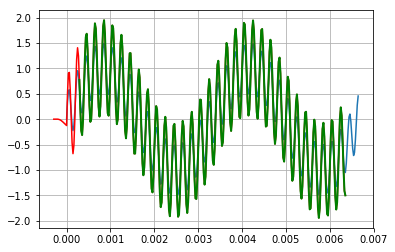

In [13]:
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The first N-1 samples are "corrupted" by the initial conditions
warmup = numtaps - 1

# The phase delay of the filtered signal
delay = (warmup / 2) / sample_rate

figure(1)
# Plot the original signal
plot(t, signal)

# Plot the filtered signal, shifted to compensate for the phase delay
plot(t-delay, filtered_signal, 'r-')

# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[warmup:]-delay, filtered_signal[warmup:], 'g', linewidth=2)

grid(True)

show()

In [14]:
#------------------------------------------------
# Print values
#------------------------------------------------
def print_values(label, values):
    var = "float32_t %s[%d]" % (label, len(values))
    print ("%-30s = {%s}" % (var, ', '.join(["%+.10f" % x for x in values])))

print_values('signal', signal)
print_values('fir_coeff', fir_coeff)
print_values('filtered_signal', filtered_signal)

float32_t signal[320]          = {+0.0000000000, +0.3436405303, +0.5614220089, +0.5794771637, +0.4064344650, +0.1298272259, -0.1201080267, -0.2242819808, -0.1239957075, +0.1547753409, +0.5120929549, +0.8153364077, +0.9539904997, +0.8852979116, +0.6519080873, +0.3642285168, +0.1547725504, +0.1233715186, +0.2958946577, +0.6135376494, +0.9571067812, +1.1962622757, +1.2433688787, +1.0896976454, +0.8090169944, +0.5270888978, +0.3696772512, +0.4105562408, +0.6410065242, +0.9734062699, +1.2774329231, +1.4339137666, +1.3840692182, +1.1537969526, +0.8429603978, +0.5841086103, +0.4876883406, +0.5963917868, +0.8675078112, +1.1905707524, +1.4330127019, +1.4949514669, +1.3504707243, +1.0583315531, +0.7376883406, +0.5188455141, +0.4894070073, +0.6580745219, +0.9510565163, +1.2425720504, +1.4068424457, +1.3700829401, +1.1410065242, +0.8072329110, +0.4990867738, +0.3357471816, +0.3760042925, +0.5939752147, +0.8898154882, +1.1309991796, +1.2071067812, +1.0754774157, +0.7788575709, +0.4277522331, +0.154

IIR Filter LOW PASS

In [15]:
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 5
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)


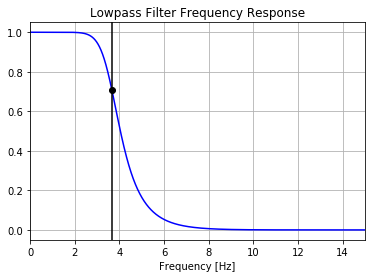

In [16]:
# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
#plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

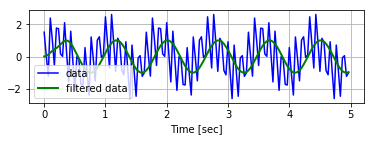

In [17]:
# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np;'
l'.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

IIR HIGH Pass

In [18]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_highpass(cutoff, fs, order)

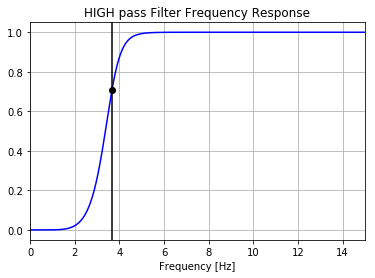

In [19]:
# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
#plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("HIGH pass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

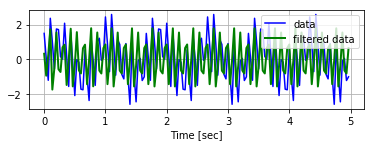

In [20]:
# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_highpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

# fig = plt.figure(figsize=(20, 4))
# ax = fig.add_subplot(111)
# ax.plot(t, data, 'b-', label='data')
# ax.plot(t, y, 'g-', linewidth=2, label='filtered data')
#plt.subplots_adjust(hspace=0.35)
plt.show()